In [1]:
# conda install -c conda-forge geopandas
# import sys
# sys.executable

# from osgeo import gdal, ogr, osr
# from fiona.ogrext import Iterator, ItemsIterator, KeysIterator
# from geopandas import GeoDataFrame
# gdal.VersionInfo()

'3000200'

In [2]:
import pandas as pd
pd.options.display.max_rows = 999
pd.set_option('max_colwidth', 600)
# import numpy as np

recycling = pd.read_csv('C:\\Users\\lilyx\\Desktop\\Recycling_Diversion_and_Capture_Rates.csv')
recycling.head(2)

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Brooklyn North,BKN01,10,2019,April,14.7,44.9,43.0,44.1
1,Brooklyn North,BKN02,10,2019,April,20.0,34.2,57.9,41.2


In [3]:
df = pd.read_csv('C:\\Users\\lilyx\\Desktop\\layer_0.csv')
df.head(2)

,SECTION,the_geom,OBJECTID,BASKETID,LOCATION_DESCRIPTION,BASKETTYPE,OWNERTYPE,STREETNAME1,STREETNAME2,DIRECTION,STATEPLANE_LABELX,STATEPLANE_LABELY,STATEPLANE_SNAPPEDX,STATEPLANE_SNAPPEDY,GlobalID
0,MN061,POINT (-73.98373405854223 40.73758037566417),8359,10610180,NE corner of 3 AV and E 21 ST,PSR Silver Bullet BlackTop Basket,DSNY-owned,3 AV,E 21 ST,NE,988758.091694,207994.429861,988703.468771,207983.986641,7f3584b3-b27f-44df-b0f8-a3d1e2a93514
1,MN023,POINT (-74.00332376829073 40.73863985524612),8360,10230040,SE corner of 8 AV and HORATIO ST,Standard Wire Basket,DSNY-owned,8 AV,HORATIO ST,SE,983329.318431,208380.030796,983320.953290,208411.977911,9a75e450-16a2-4e29-95cc-afd15740600c


In [4]:
import geopandas as gpd

fname ='C:\\Users\\lilyx\\Desktop\\DSNY_litter_baskets_official.geojson'

trashcanlocations = gpd.read_file(fname)
trashcanlocations.head(2)

,OBJECTID,BASKETID,SECTION,LOCATION_DESCRIPTION,BASKETTYPE,OWNERTYPE,STREETNAME1,STREETNAME2,DIRECTION,STATEPLANE_LABELX,STATEPLANE_LABELY,STATEPLANE_SNAPPEDX,STATEPLANE_SNAPPEDY,GlobalID,geometry
0,8359,10610180,MN061,NE corner of 3 AV and E 21 ST,PSR Silver Bullet BlackTop Basket,DSNY-owned,3 AV,E 21 ST,NE,988758.091694,207994.429861,988703.468771,207983.986641,7f3584b3-b27f-44df-b0f8-a3d1e2a93514,POINT (-73.98373 40.73758)
1,8360,10230040,MN023,SE corner of 8 AV and HORATIO ST,Standard Wire Basket,DSNY-owned,8 AV,HORATIO ST,SE,983329.318431,208380.030796,983320.953290,208411.977911,9a75e450-16a2-4e29-95cc-afd15740600c,POINT (-74.00332 40.73864)


In [5]:
food = pd.read_csv('C:\\Users\\lilyx\\Desktop\\Food_Scrap_Drop-Off_Locations_in_NYC.csv')
food.head(2)

,Borough,CouncilDist,Food_Scrap_Drop_Off_Site_Name,Hours_from,Hours_to,Latitude,Location,Longitude,NTAName,Notes,...,Website,boroCD,ct2010,point,zip_code,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,Manhattan,9,Garden of Love,6pm,10am,40.80440,302 West 116 Street,-73.95605,Central Harlem South,NaN,...,NaN,110,2000,POINT (-73.956048 40.804396),10026,12423.0,18,4,36,18
1,Brooklyn,36,Imani Garden,Dusk,Dawn,40.67651,1680 Pacific Street,-73.93298,Crown Heights North,NaN,...,NaN,308,1003,POINT (-73.932987 40.676511999999995),11213,17615.0,16,2,49,49


In [6]:
df.shape#there's 248 food scrap drop off locations

(248, 24)

In [7]:
collection = pd.read_csv('C:\\Users\\lilyx\\Desktop\\DSNY_Monthly_Tonnage_Data.csv')
collection.head(2)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,1993 / 11,Manhattan,1,625.2,119.4,34.4,NaN,NaN,NaN,NaN,1
1,1995 / 09,Manhattan,1,633.1,117.2,45.8,NaN,NaN,NaN,NaN,1


In [13]:
frequency = pd.read_csv('C:\\Users\\lilyx\\Desktop\\TrashFrequencies.csv')
frequency.head(2)

,SECTION,OBJECTID,the_geom,DISTRICT,SCHEDULECODE,FREQUENCY,FREQ_REFUSE,FREQ_RECYCLING,FREQ_ORGANICS,FREQ_BULK,Shape__Length,GlobalID,Shape__Area
0,1,1,"POLYGON ((-74.0119607836857 40.7073588271336, -74.0119221570312 40.7074061377076, -74.0119483636186 40.7074597865587, -74.011882075121 40.7074552359336, -74.0118424391789 40.7075037946932, -74.0117169127527 40.7076575608559, -74.0117005386672 40.7076776079051, -74.0117039488742 40.7077639683998, -74.0115923899646 40.7078019263395, -74.0115722416186 40.7078261061967, -74.0113353063791 40.708110417606, -74.0112499015812 40.7082128987713, -74.0112403537754 40.7082243542081, -74.0112498001351 40.7083129563935, -74.0111468872056 40.7083386021631, -74.011131234517 40.7083579466607, -74.011109595...",MN01,1011A,A,"Mon, Wed, Fri",Fri,NaN,"Mon, Wed, Fri",21656.511699,d9b55c59-b997-4790-8677-66e1e6d00f40,1.157225e+07
1,3,2,"POLYGON ((-74.0088565525029 40.7192706402468, -74.0089126184425 40.7192761920656, -74.0089813486426 40.7192829765682, -74.0090500906936 40.719289770034, -74.0091188209217 40.7192965544546, -74.0091875511651 40.7193033478392, -74.0092562814212 40.7193101321777, -74.0093050258231 40.7193149504784, -74.0093250235282 40.7193169254793, -74.0093937538123 40.7193237097357, -74.0094624841117 40.7193305029563, -74.0095312144238 40.7193372871306, -74.0095999565868 40.719344080268, -74.0096686869269 40.7193508643603, -74.0097374172823 40.7193576574166, -74.0098061476505 40.7193644414268, -74.00987488...",MN01,1013A,A,"Mon, Wed, Fri",Mon,NaN,"Mon, Wed, Fri",7054.145864,b817faf0-2459-4259-92dd-54fbc40182ae,2.482216e+06


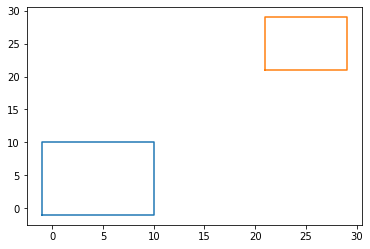

In [25]:
import numpy as np
from matplotlib import pyplot as p  #contains both numpy and pyplot
x1 = [-1,-1,10,10,-1]; y1 = [-1,10,10,-1,-1]
x2 = [21,21,29,29,21]; y2 = [21,29,29,21,21]
shapes = [[x1,y1],[x2,y2]]
for shape in shapes:
  x,y = shape
  p.plot(x,y)
p.show()

In [16]:

%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
# import pysal as ps
# from pysal.contrib.viz import mapping as maps
from descartes import PolygonPatch

In [22]:
type(frequency['the_geom'])

pandas.core.series.Series

In [38]:
shp_path = 'C:\\Users\\lilyx\\Desktop\\geo_export_4e4fa32d-bbdc-4420-ace9-93ae2882e6df.shp'
shp = gpd.read_file(shp_path, encoding='utf-8')
shp.head(1)

,district,freq_bulk,freq_organ,freq_recyc,freq_refus,frequency,global_id,objectid,scheduleco,section,shape_area,shape_leng,geometry
0,BKS15,Tue,Fri,Fri,"Tue, Fri",D,57a38922-1f51-4802-ab1a-2b31df16404a,104.0,3155D,5,4.360904e+06,10362.417114,"MULTIPOLYGON (((-73.96070 40.59353, -73.96070 40.59348, -73.96069 40.59343, -73.96069 40.59339, -73.96069 40.59334, -73.96068 40.59329, -73.96068 40.59325, -73.96068 40.59320, -73.96067 40.59315, -73.96067 40.59311, -73.96067 40.59311, -73.96067 40.59311, -73.96067 40.59310, -73.96067 40.59310, -73.96067 40.59310, -73.96067 40.59310, -73.96067 40.59310, -73.96067 40.59310, -73.96067 40.59310, -73.96067 40.59310, -73.96079 40.59302, -73.96065 40.59299, -73.96065 40.59299, -73.96065 40.59299, -73.96065 40.59299, -73.96065 40.59299, -73.96065 40.59299, -73.96065 40.59299, -73.96065 40.59299, ..."


In [43]:
shp.shape

(11, 13)

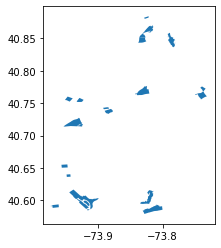

In [39]:
shp.plot()

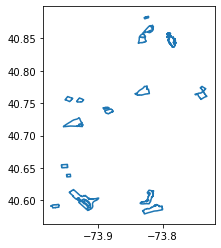

In [41]:
shp_shape = shp.to_crs({'init': 'epsg:4326'})
shp_shape.boundary.plot()

In [44]:
shp_path = 'C:\\Users\\lilyx\\Desktop\\DSNYFrequenciesExportedShapefile\\DSNY Frequencies.shp'
shp = gpd.read_file(shp_path, encoding='utf-8')
shp.head(1)

,global_id,freq_recyc,shape_area,freq_organ,objectid,section,shape_leng,freq_bulk,scheduleco,frequency,district,freq_refus,geometry
0,d9b55c59-b997-4790-8677-66e1e6d00f40,Fri,11572246.437088,None,1,1,21656.5116990349,"Mon, Wed, Fri",1011A,A,MN01,"Mon, Wed, Fri","POLYGON ((-74.01437 40.70327, -74.01437 40.70325, -74.01437 40.70325, -74.01437 40.70325, -74.01437 40.70325, -74.01437 40.70325, -74.01437 40.70325, -74.01437 40.70324, -74.01443 40.70316, -74.01431 40.70309, -74.01430 40.70306, -74.01429 40.70304, -74.01428 40.70301, -74.01427 40.70299, -74.01426 40.70296, -74.01425 40.70294, -74.01424 40.70291, -74.01422 40.70289, -74.01421 40.70286, -74.01419 40.70284, -74.01406 40.70271, -74.01405 40.70270, -74.01401 40.70267, -74.01397 40.70263, -74.01396 40.70262, -74.01394 40.70261, -74.01393 40.70260, -74.01389 40.70257, -74.01388 40.70256, -74.01..."


In [103]:
shp['freq_refus_num_days'] = shp['freq_refus'].apply(lambda x: len(x.split(',')))
# shp.head(2)
shp['freq_refus_num_days'].value_counts()

2    432
3    155
4     23
Name: freq_refus_num_days, dtype: int64

C:\Users\lilyx\Anaconda3\envs\TEST\lib\site-packages\geopandas\plotting.py:494: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  if column is None:


<Figure size 432x288 with 0 Axes>

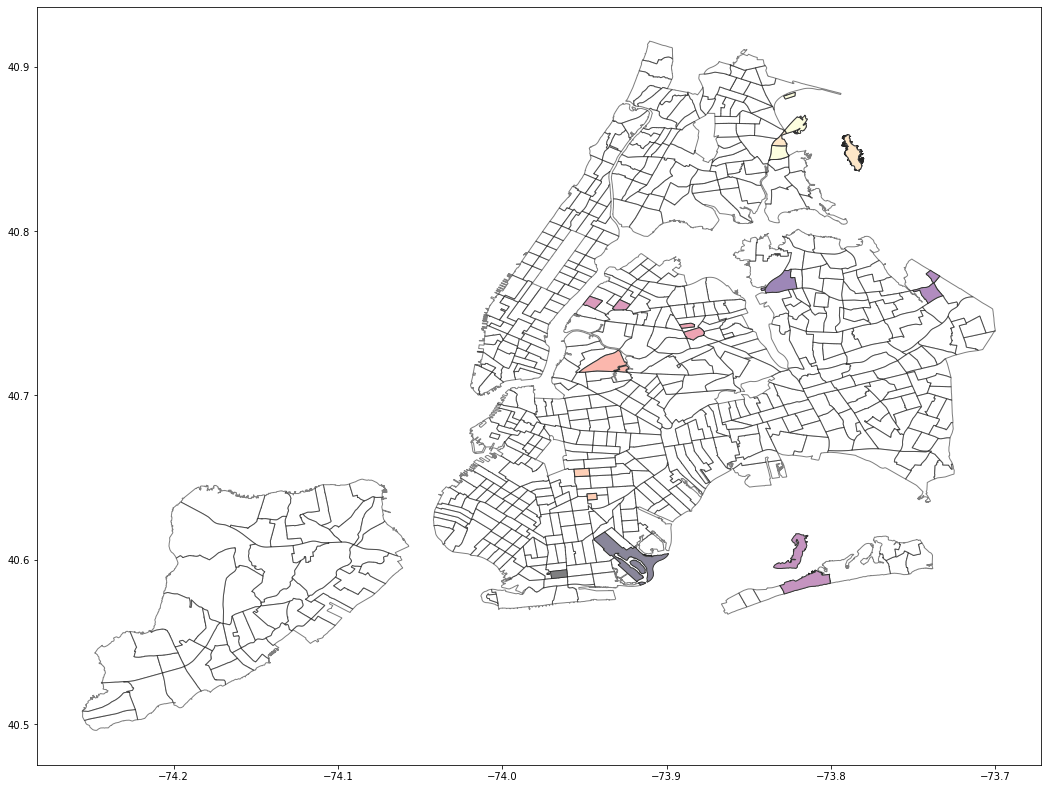

In [66]:
from descartes import PolygonPatch
import shapefile
sf=shapefile.Reader('C:\\Users\\lilyx\\Desktop\\DSNYFrequenciesExportedShapefile\\DSNY Frequencies.shp')
fig = plt.figure() 
ax = shp_shape.plot(figsize=(18, 16), color='#EFEFEF', edgecolor='#444444', cmap='magma', column='freq_refus_num_days')
for poly in sf.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='#ffffff', ec='#000000', alpha=0.5, zorder=2 ))

ax.axis('scaled')
plt.show()

In [68]:
shp = shp.to_crs({'init': 'epsg:4326'})

def intersection(municipality, urban_area):
    return municipality.intersection(urban_area)

def urban_part(municipality):
    return intersection(municipality, shp)

urban_zones = (shp.copy()
               .assign(geometry=lambda df_: df_.geometry.buffer(0).map(urban_part))
               .pipe(lambda df_: df_[~df_.is_empty].copy())
               .to_crs({'init': 'epsg:4326'}))
urban_zones.shape

AttributeError: 'GeoDataFrame' object has no attribute '_geom'

Initializing Display
Display Initialized


C:\Users\lilyx\Anaconda3\envs\TEST\lib\site-packages\geopandas\plotting.py:494: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  if column is None:


<Figure size 432x288 with 0 Axes>

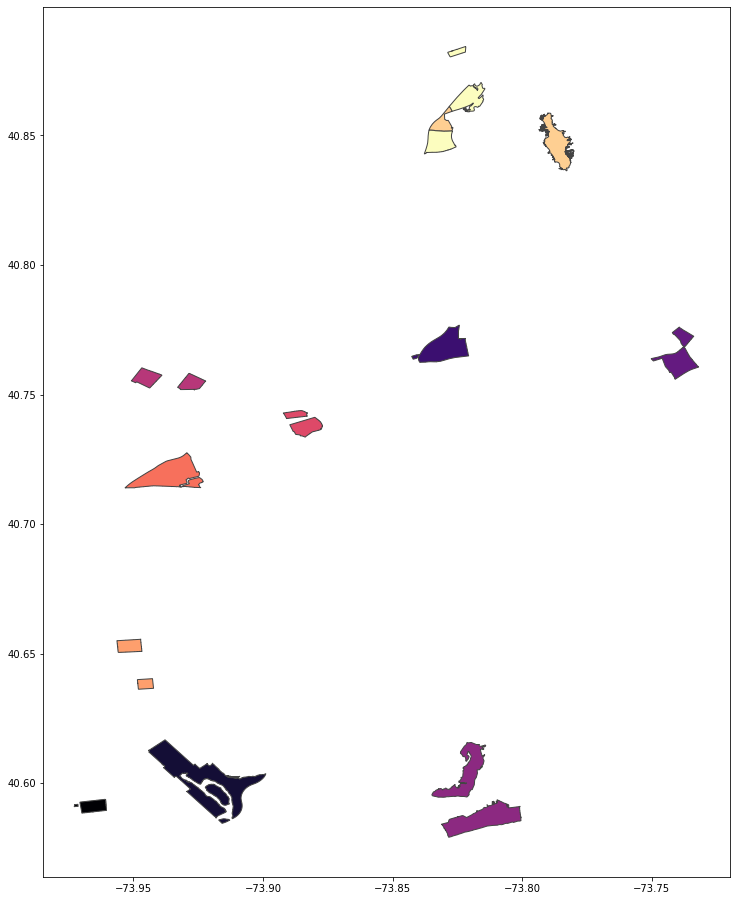

In [87]:
import shapefile
import matplotlib.pyplot as plt
import matplotlib

sf = shapefile.Reader("C:\\Users\\lilyx\\Desktop\\DSNYFrequenciesExportedShapefile\\DSNY Frequencies.shp")

print("Initializing Display")
fig = plt.figure()
ax = shp_shape.plot(figsize=(24, 16), color='#EFEFEF', edgecolor='#444444', cmap='magma', column='freq_refus_num_days')
# ax = fig.add_subplot(111)
# plt.xlim([76, 85])
# plt.ylim([12, 21])
print("Display Initialized")

In [104]:
# len(list(sf.shapes()))

colordict = {2:'y', 3:'g', 4:'b'}

colors = colordict[2]
print(colors)

y


(610, 14)

In [ ]:
# sf = shapefile.Reader("C:\\Users\\lilyx\\Desktop\\DSNYFrequenciesExportedShapefile\\DSNY Frequencies.shp")

# # sf['freq_refus_num_days'] = sf['freq_refus'].apply(lambda x: len(x.split(',')))

# print("Initializing Display")
# fig = plt.figure()
# ax = shp_shape.plot(figsize=(24, 16), color='#EFEFEF', edgecolor='#444444')
# # ax = fig.add_subplot(111)
# # plt.xlim([76, 85])
# # plt.ylim([12, 21])
# print("Display Initialized")


# colordict = {2:"'y'", 3:"'g'", 4:"'b'"}

# for shape, i in zip(sf.shapes(), shp['freq_refus_num_days']):
#     print(colordict[i])

Display Initialized


<Figure size 432x288 with 0 Axes>

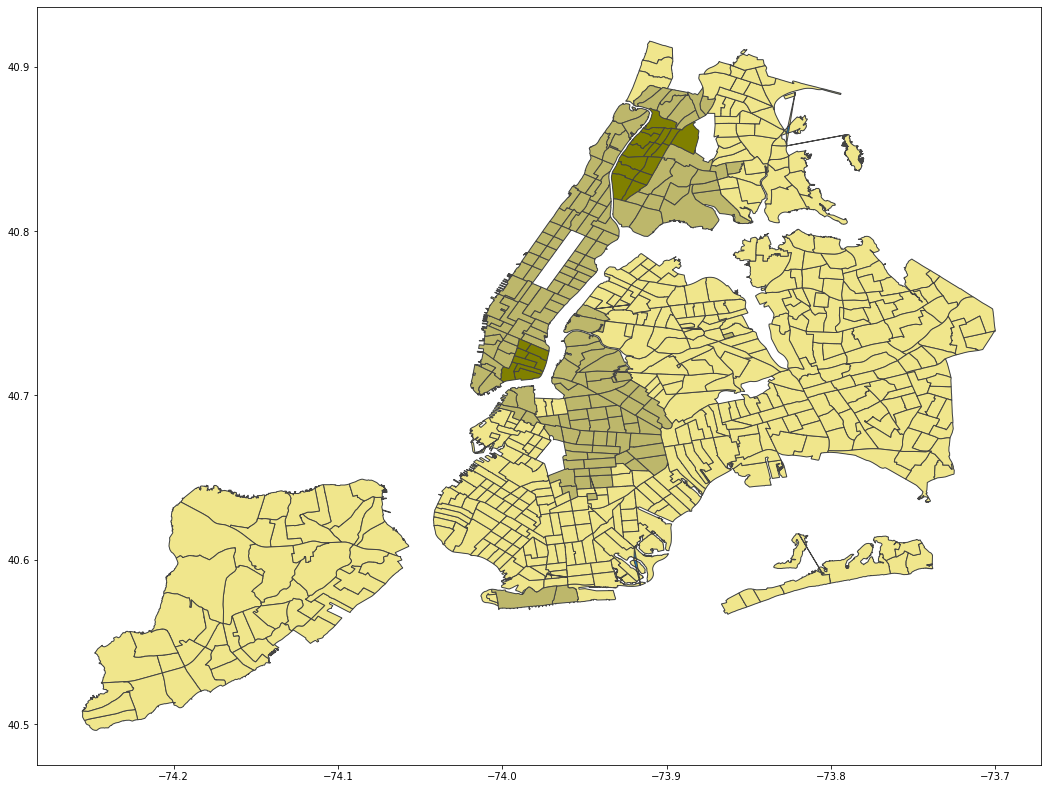

In [140]:
import shapefile
import matplotlib.pyplot as plt
import matplotlib

sf = shapefile.Reader("C:\\Users\\lilyx\\Desktop\\DSNYFrequenciesExportedShapefile\\DSNY Frequencies.shp")


# print("Initializing Display")
fig = plt.figure()
ax = shp.plot(figsize=(18, 24))
# ax = fig.add_subplot(111)
# plt.xlim([76, 85])
# plt.ylim([12, 21])
print("Display Initialized")


colordict = {2:'khaki', 3:'darkkhaki', 4:'olive'}

for shape, i in zip(sf.shapes(), shp['freq_refus_num_days']):
#     print("Finding Points")
    points = shape.points
#     print("Found Points")    

#     print("Creating Polygon")
    numTrashPickedUp = i
    colors = colordict[numTrashPickedUp]
    ap = plt.Polygon(points, fill=True, facecolor=colors, edgecolor='#444444')
    ax.add_patch(ap)
#     print("Polygon Created")

# print("Displaying Polygons")
plt.show()